# Подопригора Анна БИ-3-20-01


### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Чтение данных

In [2]:
data= pd.read_excel("C:\\Users\\annap\\Desktop\\вуз\\3 курс\\ЭКОНОМЕТРИКА\\РГЗ\\данные\\данные.xlsx", header=0)
data.head(5)

,№ предприятия,Y3,X6,X7,X9,X12,X14,X15
0,1,13.26,0.40,1.37,0.23,167.69,6.40,17.72
1,2,10.16,0.26,1.49,0.39,186.10,7.80,18.39
2,3,13.72,0.40,1.44,0.43,220.45,9.76,26.46
3,4,12.85,0.50,1.42,0.18,169.30,7.90,22.37
4,5,10.63,0.40,1.35,0.15,39.53,5.35,28.13


In [3]:
X_regr=data[['X6','X7','X9','X12','X14','X15']]
Y_regr=data['Y3']

### Построение линейной регрессии

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()
model.fit(X_regr, Y_regr) # обучение модели
w = model.coef_
b = model.intercept_
w

array([-5.43195852,  4.35083075, -3.3447926 ,  0.0150884 , -0.80289952,
       -0.40799025])

### Коэффициент детерминации

In [6]:
model.score(X_regr, Y_regr)

0.15077048601893683

### Ошибка аппроксимации

In [7]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_predicted = model.predict(X_regr)
print('MSE: ', mean_squared_error(Y_regr, y_predicted))
print('MAE: ', mean_absolute_error(Y_regr, y_predicted))

MSE:  27.808816808778943
MAE:  4.167837130542981


### Диаграмма остатков

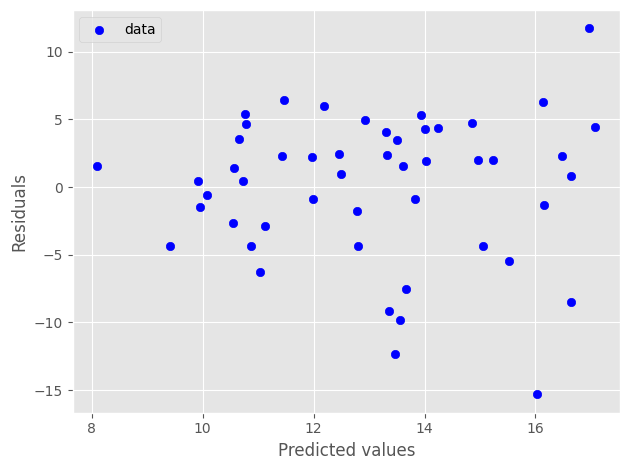

In [8]:
plt.scatter(y_predicted,  y_predicted - Y_regr,
            c='blue', marker='o', label='data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

### Метод наименьших квадратов

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
mod = smf.ols(formula='Y3 ~ X6+X7+X9+X12+X14+X15', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y3   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.272
Date:                Tue, 24 Jan 2023   Prob (F-statistic):              0.290
Time:                        23:56:41   Log-Likelihood:                -154.08
No. Observations:                  50   AIC:                             322.2
Df Residuals:                      43   BIC:                             335.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0525     11.700      1.885      0.0